In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
warnings.filterwarnings("ignore", category=FutureWarning) #ignore warnings

In [2]:
df = pd.read_excel('forecasting_case_study.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   float64       
 4   In-Store Promo      1218 non-null   int64         
 5   Catalogue Promo     1218 non-null   int64         
 6   Store End Promo     1218 non-null   int64         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int64         
 9   V_DAY               1218 non-null   int64         
 10  EASTER              1218 non-null   int64         
 11  CHRISTMAS           1218 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 114.3+ KB


In [4]:
df.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [5]:
df.isnull().sum().sum()

0

There are no missing values in the data set.

# Data Understanding

In [6]:
unique_products = df["Product"].unique()
product_counts = df['Product'].value_counts()
print(f"There are {len(unique_products)} total unique products in the data set. \nThe product SKU numbers are listed below with the item count next to them:")
print(product_counts)

There are 6 total unique products in the data set. 
The product SKU numbers are listed below with the item count next to them:
SKU1    204
SKU2    204
SKU3    204
SKU4    204
SKU5    204
SKU6    198
Name: Product, dtype: int64


In [7]:
early = df["date"].min()
late = df["date"].max()
print(f"The earliest date in this data set is {early} and the latest date is {late}.")

The earliest date in this data set is 2017-02-05 00:00:00 and the latest date is 2020-12-27 00:00:00.


In [8]:
df.describe()

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,0.251043,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,0.215494,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,0.400000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,0.830000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


In [9]:
labels = df.columns.values.tolist()
rs = np.random.RandomState(0)
pd.DataFrame(rs.rand(12, 12), index = labels,
                  columns = labels)
corr = df.corr()
#show correlation heatmap plot with 2 digit precision
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

#code to mask upper half of the correlational matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
Sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Price Discount (%),0.40,nan,nan,nan,nan,nan,nan,nan,nan,nan
In-Store Promo,0.24,0.22,nan,nan,nan,nan,nan,nan,nan,nan
Catalogue Promo,-0.12,-0.07,-0.49,nan,nan,nan,nan,nan,nan,nan
Store End Promo,0.24,0.22,0.37,0.12,nan,nan,nan,nan,nan,nan
Google_Mobility,0.06,-0.21,0.06,0.07,0.08,nan,nan,nan,nan,nan
Covid_Flag,-0.09,0.28,-0.02,-0.09,-0.08,-0.76,nan,nan,nan,nan
V_DAY,-0.01,-0.04,0.02,-0.04,0.02,0.08,0.01,nan,nan,nan
EASTER,-0.01,0.00,0.02,-0.04,-0.07,-0.11,0.01,-0.02,nan,nan
CHRISTMAS,-0.04,-0.01,0.01,0.05,-0.00,0.00,-0.00,-0.02,-0.02,nan


Identify data points outside of 3 standard deviations:

In [10]:
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()
potential_outliers = df.loc[(df['Sales'] > mean_sales + 3*std_sales) | (df['Sales'] < mean_sales - 3*std_sales)]
print(potential_outliers.count())
print(potential_outliers)

Product               26
date                  26
Sales                 26
Price Discount (%)    26
In-Store Promo        26
Catalogue Promo       26
Store End Promo       26
Google_Mobility       26
Covid_Flag            26
V_DAY                 26
EASTER                26
CHRISTMAS             26
dtype: int64
     Product       date   Sales  Price Discount (%)  In-Store Promo  \
46      SKU1 2017-12-24  155253                0.17               1   
98      SKU1 2018-12-23  174994                0.28               1   
150     SKU1 2019-12-22  258874                0.44               0   
421     SKU3 2017-05-07  212245                0.50               1   
426     SKU3 2017-06-11  248373                0.50               1   
437     SKU3 2017-08-27  236242                0.50               1   
447     SKU3 2017-11-05  212947                0.50               1   
478     SKU3 2018-06-10  288322                0.50               1   
494     SKU3 2018-09-30  237462                0

In [11]:
df.shape[0]

1218

Since there are only 26 data points out of 1218, this suggests that the data is relatively clean and does not have many extreme values.

We need to understand what exactly Google_Mobility is. To do this, we can plot the data points visually with `Google_Mobility` on y axis against `date`. First we sort the entire dataframe by date, then we plot the figure.

In [12]:
df = df.sort_values('date')

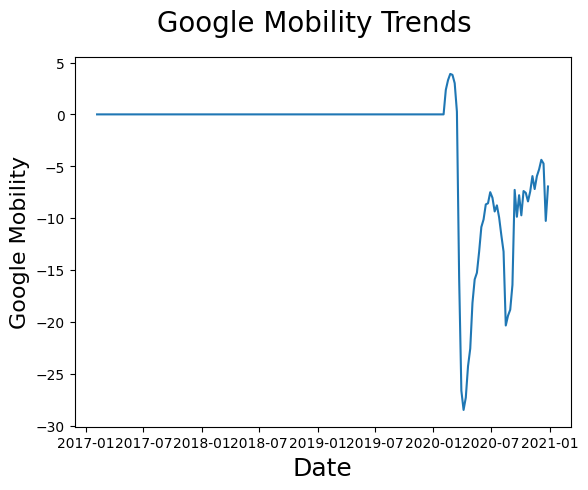

In [13]:
fig = plt.figure()
plt.plot(df['date'], df['Google_Mobility'])
fig.suptitle('Google Mobility Trends', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Google Mobility', fontsize=16)
fig.savefig('google_mobility_trends.jpg')

From the figure above, we conclude that there were a certain time period that `Google_Mobility` data was not collected before 2020. Therefore, the dataset has to be split into the following to compare predictions of the ML model:

-  Entire dataframe with `Google_Mobility` column dropped: `df_ignore_gm`
-  Entire dataframe with `Google_Mobility` being in the flatline before the first `Google_Mobility` non-zero value, `Google_Mobility` column dropped: `df_no_gm`
-  Entire dataframe with `Google_Mobility` values after the first `Google_Mobility` non-zero value, `Google_Mobility` column kept: `df_yes_gm`

# Data Transformation

In [14]:
first_non_zero_idx = (df['Google_Mobility'] != 0).idxmax()
print('Index of first non-zero value:', first_non_zero_idx)
first_nonzero_index = df[df['Google_Mobility'] != 0].index[0]
first_nonzero_date = df.loc[first_nonzero_index, 'date']
print('Date of first non-zero value:', first_nonzero_date)

Index of first non-zero value: 565
Date of first non-zero value: 2020-02-09 00:00:00


Here we separate `df` into the 3 groups discussed above:

In [15]:
df_ignore_gm = df.drop('Google_Mobility', axis=1)
df_no_gm = df.loc[:first_nonzero_index].drop(columns=['Google_Mobility'])
df_yes_gm = df.loc[first_nonzero_index:].copy()

In [16]:
dfs = {'df': df, 'df_ignore_gm': df_ignore_gm, 'df_no_gm': df_no_gm, 'df_yes_gm': df_yes_gm}
for name, df in dfs.items():
    print(f"The shape of {name} is: {df.shape}.")

The shape of df is: (1218, 12).
The shape of df_ignore_gm is: (1218, 11).
The shape of df_no_gm is: (943, 11).
The shape of df_yes_gm is: (276, 12).


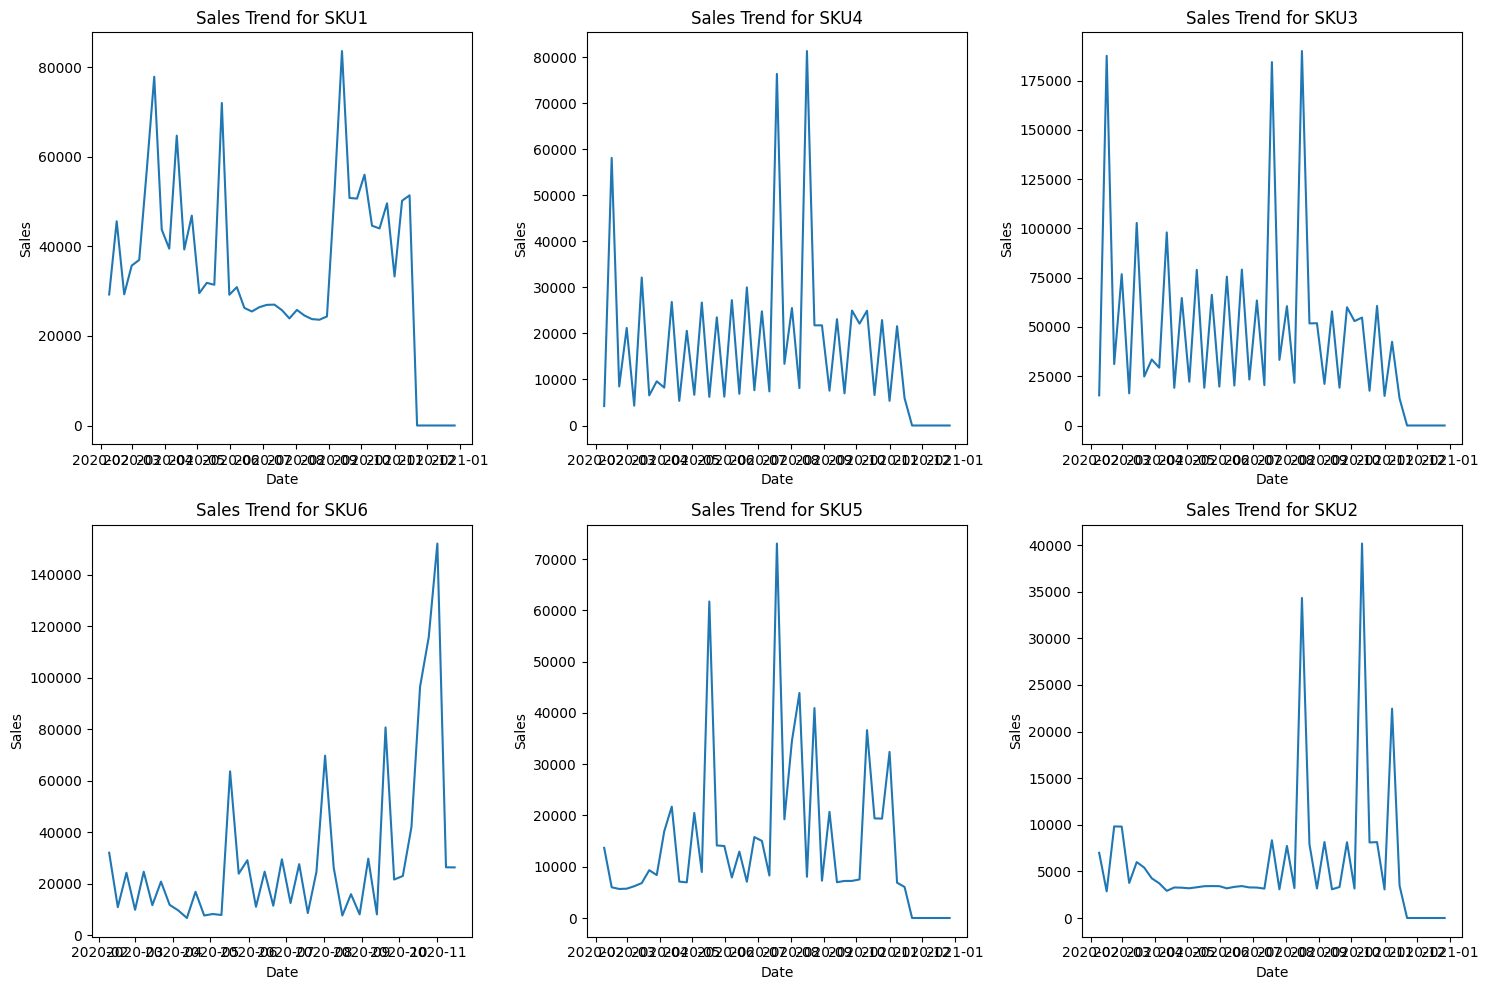

In [18]:
SKUs = df_ignore_gm['Product'].unique()  # get unique SKUs in the data
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, SKU in enumerate(SKUs):
    row = i // 3  
    col = i % 3     
    subset = df[df['Product'] == SKU]
    axes[row, col].plot(subset['date'], subset['Sales'])
    axes[row, col].set_title(f'Sales Trend for {SKU}')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Sales')
    #axes[row, col].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.tight_layout()
plt.show()

# Feature Engineering

The products can be transformed into numerical values with label encoding.

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Product Category'] = le.fit_transform(df['Product'])
for name, df in dfs.items():
    df['Product Category'] = le.fit_transform(df['Product'])
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  
0          0          0

Then another column for labelling as 1 if there are promos applied, and 0 if there are none which will be called `Promotions`.

In [35]:
promotional_cols = ['In-Store Promo', 'Catalogue Promo', 'Store End Promo', 'V_DAY', 'EASTER', 'CHRISTMAS']
for name, df in dfs.items():
    df['Promotions'] = (df[promotional_cols] == 1).any(axis=1).astype(int)
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 

Then a `Sales After Discount` column that considers actual sales after the discounts.

In [36]:
for name, df in dfs.items():
    df['Sales After Discount'] = df['Sales'] * (1 - df['Price Discount (%)'])
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05  27750                0.00               0   
612     SKU4 2017-02-05  12835                0.30               0   
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0              0.0           0      0   
612                 1                1              0.0           0      0   
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 

A `Sales Mobility Ratio` column that takes each `Sales After Discount` value and divide by absolute value of `Google_Mobility` value (might need to figure out if the absolute value is necessary later)

In [34]:
df_yes_gm['Sales Mobility Ratio'] = df_yes_gm['Sales After Discount'] / abs(df_yes_gm['Google_Mobility'])
print(f"\n Check df_yes_gm's new transformed dataframe': \n")
print(df_yes_gm.head())


 Check df_yes_gm's new transformed dataframe': 

    Product       date  Sales  Price Discount (%)  In-Store Promo  \
565    SKU3 2020-02-09  15286                0.67               0   
361    SKU2 2020-02-09   6993                0.25               0   
157    SKU1 2020-02-09  29239                0.01               1   
973    SKU5 2020-02-09  13686                0.25               0   
769    SKU4 2020-02-09   4218                0.51               0   

     Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
565                1                1             2.36           1      0   
361                0                0             2.36           1      0   
157                0                1             2.36           1      0   
973                0                0             2.36           1      0   
769                1                1             2.36           1      0   

     EASTER  CHRISTMAS  Product Category  Promotions  Sales After Discou

A new `MA_3months` column that considers the moving average size of 90 days where the first two rows are dropped to get rid of NaN values:

In [43]:
for name, df in dfs.items():
    df['MA_3months'] = df['Sales After Discount'].rolling(window=90, min_periods=1).mean()
    df.dropna(inplace=True)
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   
204     SKU2 2017-02-05   7180                0.25               1   
205     SKU2 2017-02-12   7080                0.25               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   
204                 0                0              0.0           0      0   
205                 0                0              0.0           0      1   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 

From date we can categorize them even further into quarters and seasons. Here in the `Season` column, 0 is spring for Q1 & Q2 and 1 is fall for Q3 & Q4.

In [45]:
for name, df in dfs.items():
    df['Quarter'] = pd.to_datetime(df['date']).dt.quarter
    df['Season'] = df['Quarter'].map({1: 0, 2: 0, 3: 1, 4: 1})
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   
204     SKU2 2017-02-05   7180                0.25               1   
205     SKU2 2017-02-12   7080                0.25               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   
204                 0                0              0.0           0      0   
205                 0                0              0.0           0      1   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 

A column that has encoded season values from 0 to 1.

In [48]:
for name, df in dfs.items():
    df['Quarter_Encoded'] = le.fit_transform(df['Quarter'])
    df['Encoded_Season'] = (df['Quarter_Encoded'] / 4) + 0.25
    df.drop(columns=['Quarter_Encoded'], inplace=True)
    print(f"\n Check {name}'s new transformed dataframe': \n")
    print(df.head())


 Check df's new transformed dataframe': 

     Product       date  Sales  Price Discount (%)  In-Store Promo  \
408     SKU3 2017-02-05  39767                0.30               0   
1020    SKU6 2017-02-05  32138                0.28               0   
816     SKU5 2017-02-05   5229                0.00               0   
204     SKU2 2017-02-05   7180                0.25               1   
205     SKU2 2017-02-12   7080                0.25               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
408                 1                1              0.0           0      0   
1020                0                0              0.0           0      0   
816                 0                0              0.0           0      0   
204                 0                0              0.0           0      0   
205                 0                0              0.0           0      1   

      EASTER  CHRISTMAS  Product Category  Promotions  Sales After 